In [54]:
# To call Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
# To read the data set
df=pd.read_csv('/content/drive/MyDrive/ML-Project/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#To Check if there is any null value in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

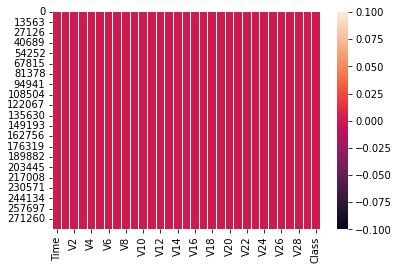

In [58]:
#To visualize the null value by drawing heatmap
sns.heatmap(df.isnull())

In [59]:
#to get a idea of the dataset and to check if there are any object data type in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [60]:
#Applying StandardScaler on Time and Amount column
from sklearn.preprocessing import StandardScaler

In [61]:
#create object of the class
ss=StandardScaler()

In [62]:
#Transforming time column
df['Time']=ss.fit_transform(df[['Time']])

In [63]:
#Transforming Amount column
df['Amount']=ss.fit_transform(df[['Amount']])

In [64]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [65]:
df.shape

(284807, 31)

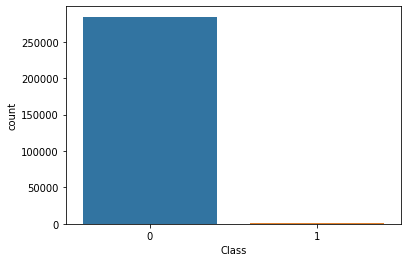

In [66]:
#Check if the class(output column) is balance or not
sns.countplot(data=df,x='Class')
plt.show()

In [67]:
#to get the count of a particular value
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [68]:
#To seperate input and output
X=df.drop('Class',axis=1)
Y=df['Class']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [71]:
#Performing sampling technique
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [72]:
#Performing Random over sampling method
ros=RandomOverSampler()

In [73]:
X_sample_train1,Y_sample_train1=ros.fit_resample(X_train,Y_train)

In [74]:
#initially 70% Class column record which was not balanced
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [75]:
#after performing random over sampling 70% Class column record which is now balanced
pd.Series(Y_sample_train1).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [76]:
X_sample_test1,Y_sample_test1=ros.fit_resample(X_test,Y_test)

In [77]:
#initially 30% Class column record which was not balanced
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [78]:
#after performing random over sampling 30% Class column record which is now balanced
pd.Series(Y_sample_test1).value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [79]:
#perform RandomUnderSampling 

In [80]:
#creating object of the class
rus=RandomUnderSampler()

In [81]:
X_sample_train2,Y_sample_train2=rus.fit_resample(X_train,Y_train)
X_sample_test2,Y_sample_test2=rus.fit_resample(X_test,Y_test)

In [82]:
#To chech if under sampling performed correctly or not
print('training')
print(pd.Series(Y_train).value_counts())
print(pd.Series(Y_sample_train2).value_counts())

print('Testing')
print(pd.Series(Y_test).value_counts())
print(pd.Series(Y_sample_test2).value_counts())


training
0    199007
1       357
Name: Class, dtype: int64
0    357
1    357
Name: Class, dtype: int64
Testing
0    85308
1      135
Name: Class, dtype: int64
0    135
1    135
Name: Class, dtype: int64


In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [84]:
lr=LogisticRegression()

In [85]:
#This function is perform on Random over sampling value
def create_model(model):
    model.fit(X_sample_train1,Y_sample_train1)
    Y_pred=model.predict(X_sample_test1)
    print(classification_report(Y_sample_test1,Y_pred))
    print(confusion_matrix(Y_sample_test1,Y_pred))
    return model

In [86]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.89      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83736  1572]
 [ 8999 76309]]


LogisticRegression()

In [87]:
#This function is perform on Random under sampling value
def create_model2(model):
    model.fit(X_sample_train2,Y_sample_train2)
    Y_pred=model.predict(X_sample_test2)
    print(classification_report(Y_sample_test2,Y_pred))
    print(confusion_matrix(Y_sample_test2,Y_pred))
    return model

In [88]:
create_model2(lr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       135
           1       0.98      0.90      0.94       135

    accuracy                           0.94       270
   macro avg       0.94      0.94      0.94       270
weighted avg       0.94      0.94      0.94       270

[[132   3]
 [ 13 122]]


LogisticRegression()

In [89]:
#Here we Understood looking at the score is that random over sampling is the best over here 

In [90]:
#Score is good but we will try to make it better
#Since we have not done the feature selection now we will perform feature selection
#means we will introduce decision tree algorithm

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
#crteating object of DecissionTreeClassifier
#by default it takes GINI index
dt=DecisionTreeClassifier()

In [93]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.64      0.78     85308

    accuracy                           0.82    170616
   macro avg       0.87      0.82      0.82    170616
weighted avg       0.87      0.82      0.82    170616

[[85284    24]
 [30429 54879]]


In [94]:
#crteating object of DecissionTreeClassifier
#by using entropy
dt1=DecisionTreeClassifier(criterion='entropy')
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     85308
           1       1.00      0.69      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.84    170616
weighted avg       0.88      0.85      0.84    170616

[[85272    36]
 [26299 59009]]


In [95]:
#We undersood that entropy is a better technique over here

In [96]:
#Now we will do the pruning  technique on decision tree entropy
#1)max_depth
#2)min_samples_leaf

In [97]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [98]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85308
           1       0.97      0.83      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

[[83237  2071]
 [14719 70589]]


In [99]:
dt2=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=80)

In [100]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

[[85003   305]
 [17210 68098]]


In [101]:
#By using Decisiontree entropy max_depth we got comparitively better score


In [102]:
#Now we will be using Support Vector Machine algo

In [103]:
#call the class
from sklearn.svm import LinearSVC

In [104]:
#createing object of the class

svc=LinearSVC(random_state=1)

In [ ]:
create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83880  1428]
 [10291 75017]]


LinearSVC(random_state=1)

In [106]:
#Now lets introduce error in the Linear kernal function
svc=LinearSVC(random_state=1,C=0.6)
create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83999  1309]
 [10291 75017]]


LinearSVC(C=0.6, random_state=1)

In [107]:
#Here we see that even after intoducing error while traibg we got the same error hence we know that 
#This dataset has non-linear data
#One non-linear data we perform two function
#1)polynomial kernel function
#2)Radial Kernel function

In [108]:
from sklearn.svm import SVC

In [109]:
poly_svc=SVC(random_state=1,kernel='poly')


In [110]:
poly_svc=create_model(poly_svc)

In [111]:
radial_svc=SVC(random_state=1,kernel='rbf')

In [112]:
create_model(radial_svc)

In [113]:
#Now we will apply Ensembling technique
#Boosting technique
#1)ada boost 
#2)gardient Boost
#3)extreme gradient boost

In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
ada=AdaBoostClassifier(n_estimators=75)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.99      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[84431   877]
 [13499 71809]]


In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=75)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[84761   547]
 [12267 73041]]


In [117]:
!pip install XGBoost

In [128]:

from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=50,reg_alpha=1)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[84628   680]
 [12198 73110]]


In [119]:
#Performing Random Forest Tree
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf=RandomForestClassifier(n_estimators=10,max_features=11,random_state=1)
create_model(rf)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.75      0.85     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

[[85300     8]
 [21741 63567]]


RandomForestClassifier(max_features=11, n_estimators=10, random_state=1)

In [121]:
#Performing Stacking
from sklearn.ensemble import StackingClassifier

In [122]:
lr1=LogisticRegression()
dt_3=DecisionTreeClassifier()
dt_4=DecisionTreeClassifier(criterion='entropy')

In [123]:
model_list=[lr1,dt_3,dt_4]

In [124]:
meta=LogisticRegression()

In [126]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

TypeError: ignored

In [ ]:
create_model(sc)